In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor 


from sklearn.neighbors import KNeighborsClassifier

In [83]:
df = pd.read_csv('heart.csv')

In [84]:
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [85]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [86]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

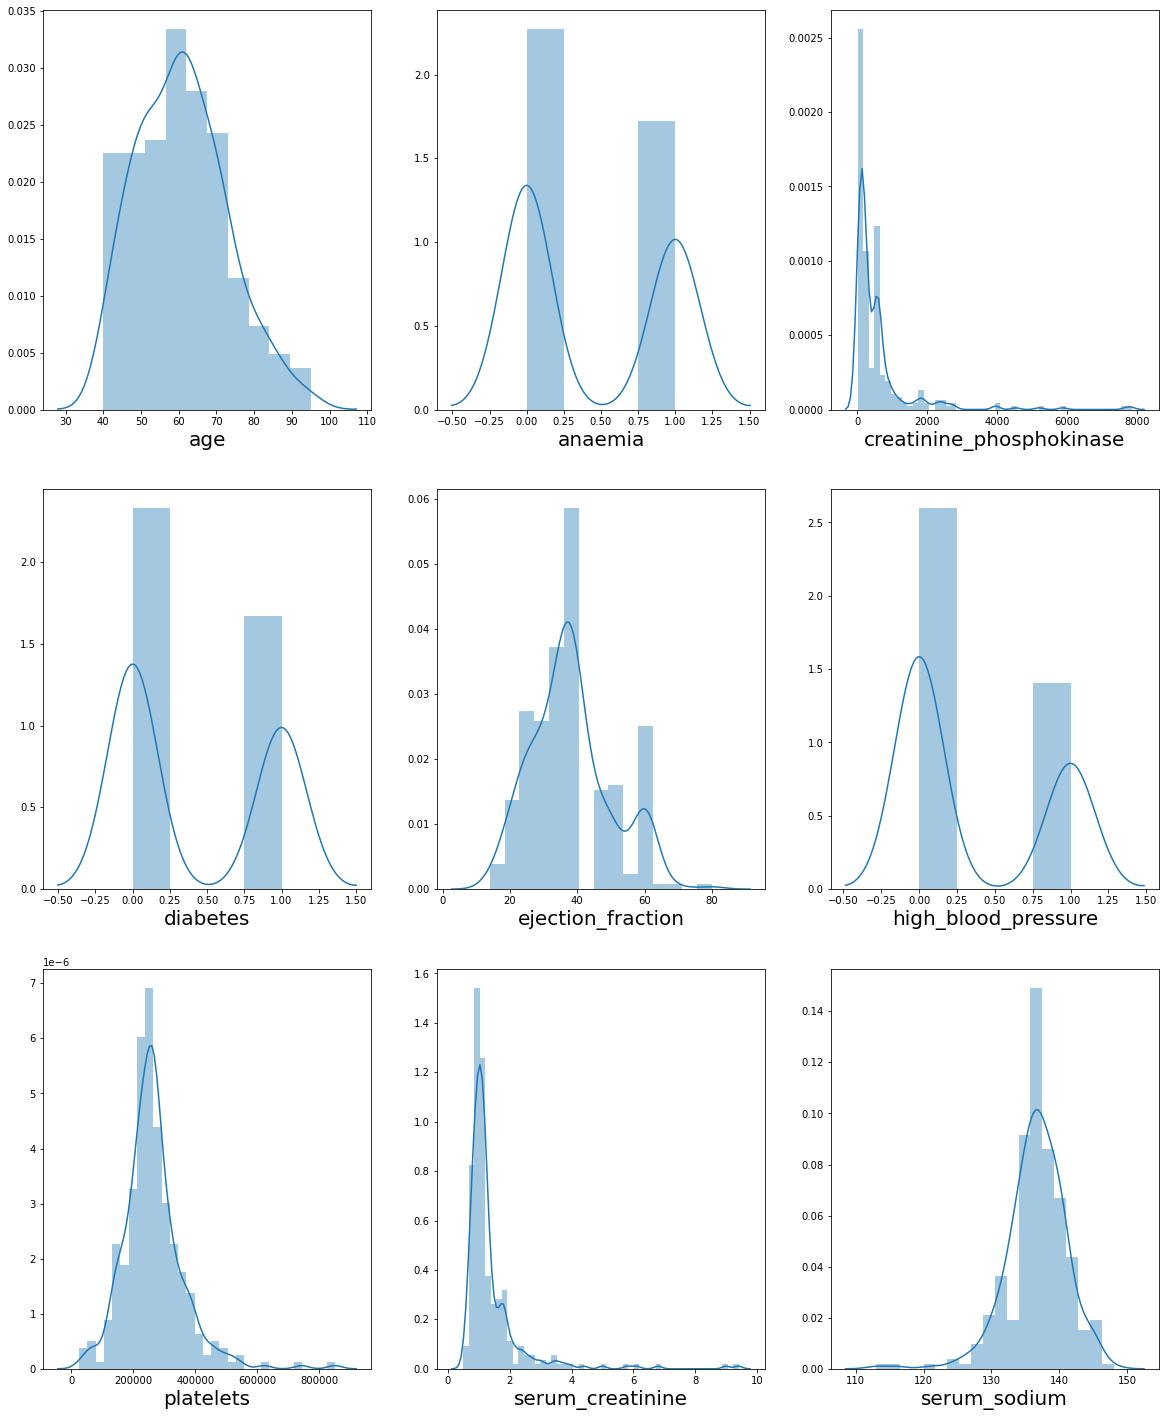

In [87]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [88]:
df[df['ejection_fraction']==0]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [89]:
df[df['high_blood_pressure']==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,52.0,1,191,1,30,1,334000.00,1.0,142,1,1,216,0
257,58.0,0,132,1,38,1,253000.00,1.0,139,1,0,230,0
270,44.0,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
275,45.0,0,582,0,38,1,422000.00,0.8,137,0,0,245,0


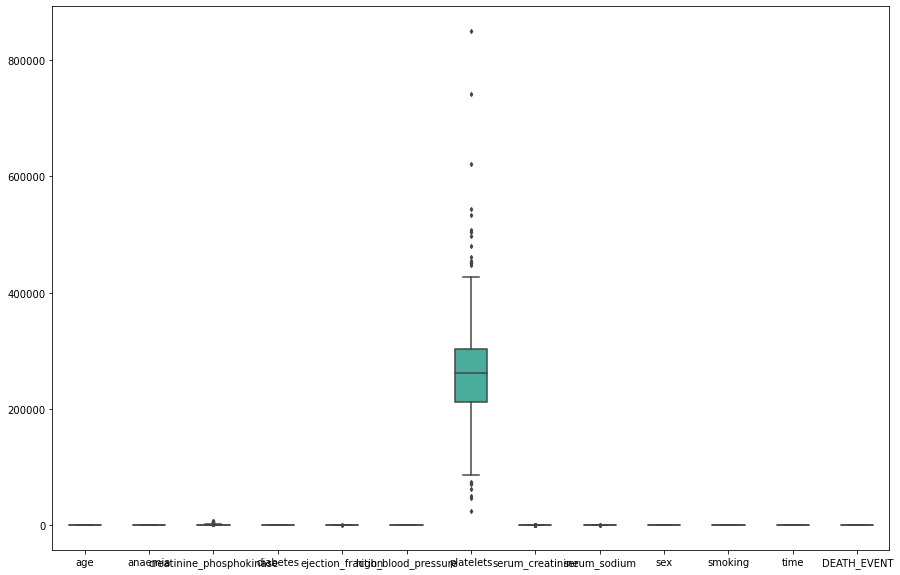

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [91]:
df['sex'].quantile(0.95)

1.0

In [92]:
df['time'].quantile(0.95)

250.0

In [93]:
df['serum_creatinine'].quantile(0.25)

0.9

In [94]:
df['age'].quantile(0.95)

82.0

In [95]:
df['anaemia'].quantile(0.95)

1.0

In [96]:
c=df['creatinine_phosphokinase'].quantile(0.95)

In [97]:
df['high_blood_pressure'].quantile(0.95)

1.0

In [98]:
p=df['platelets'].quantile(0.95)
p

422499.9999999998

In [99]:
df['smoking'].quantile(0.95)

1.0

In [100]:
df['time'].quantile(0.95)

250.0

In [101]:
e=df['ejection_fraction'].quantile(0.95)
e

60.0

In [102]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [103]:
#OUTLIER IS MORE IN FEATURES PLATELETES CRETINININE PHOSPHOKINASE AGE TIME EJECTION FRACTION


In [104]:
df['platelets']=df[df['platelets']<p]

In [105]:
df['platelets'].quantile(0.95)

81.84999999999997

In [106]:
df['creatinine_phosphokinase']=df[df['creatinine_phosphokinase']<c]

In [107]:
df['ejection_fraction']=df[df['ejection_fraction']<c]

In [108]:
df['creatinine_phosphokinase'].quantile(0.95)

82.0

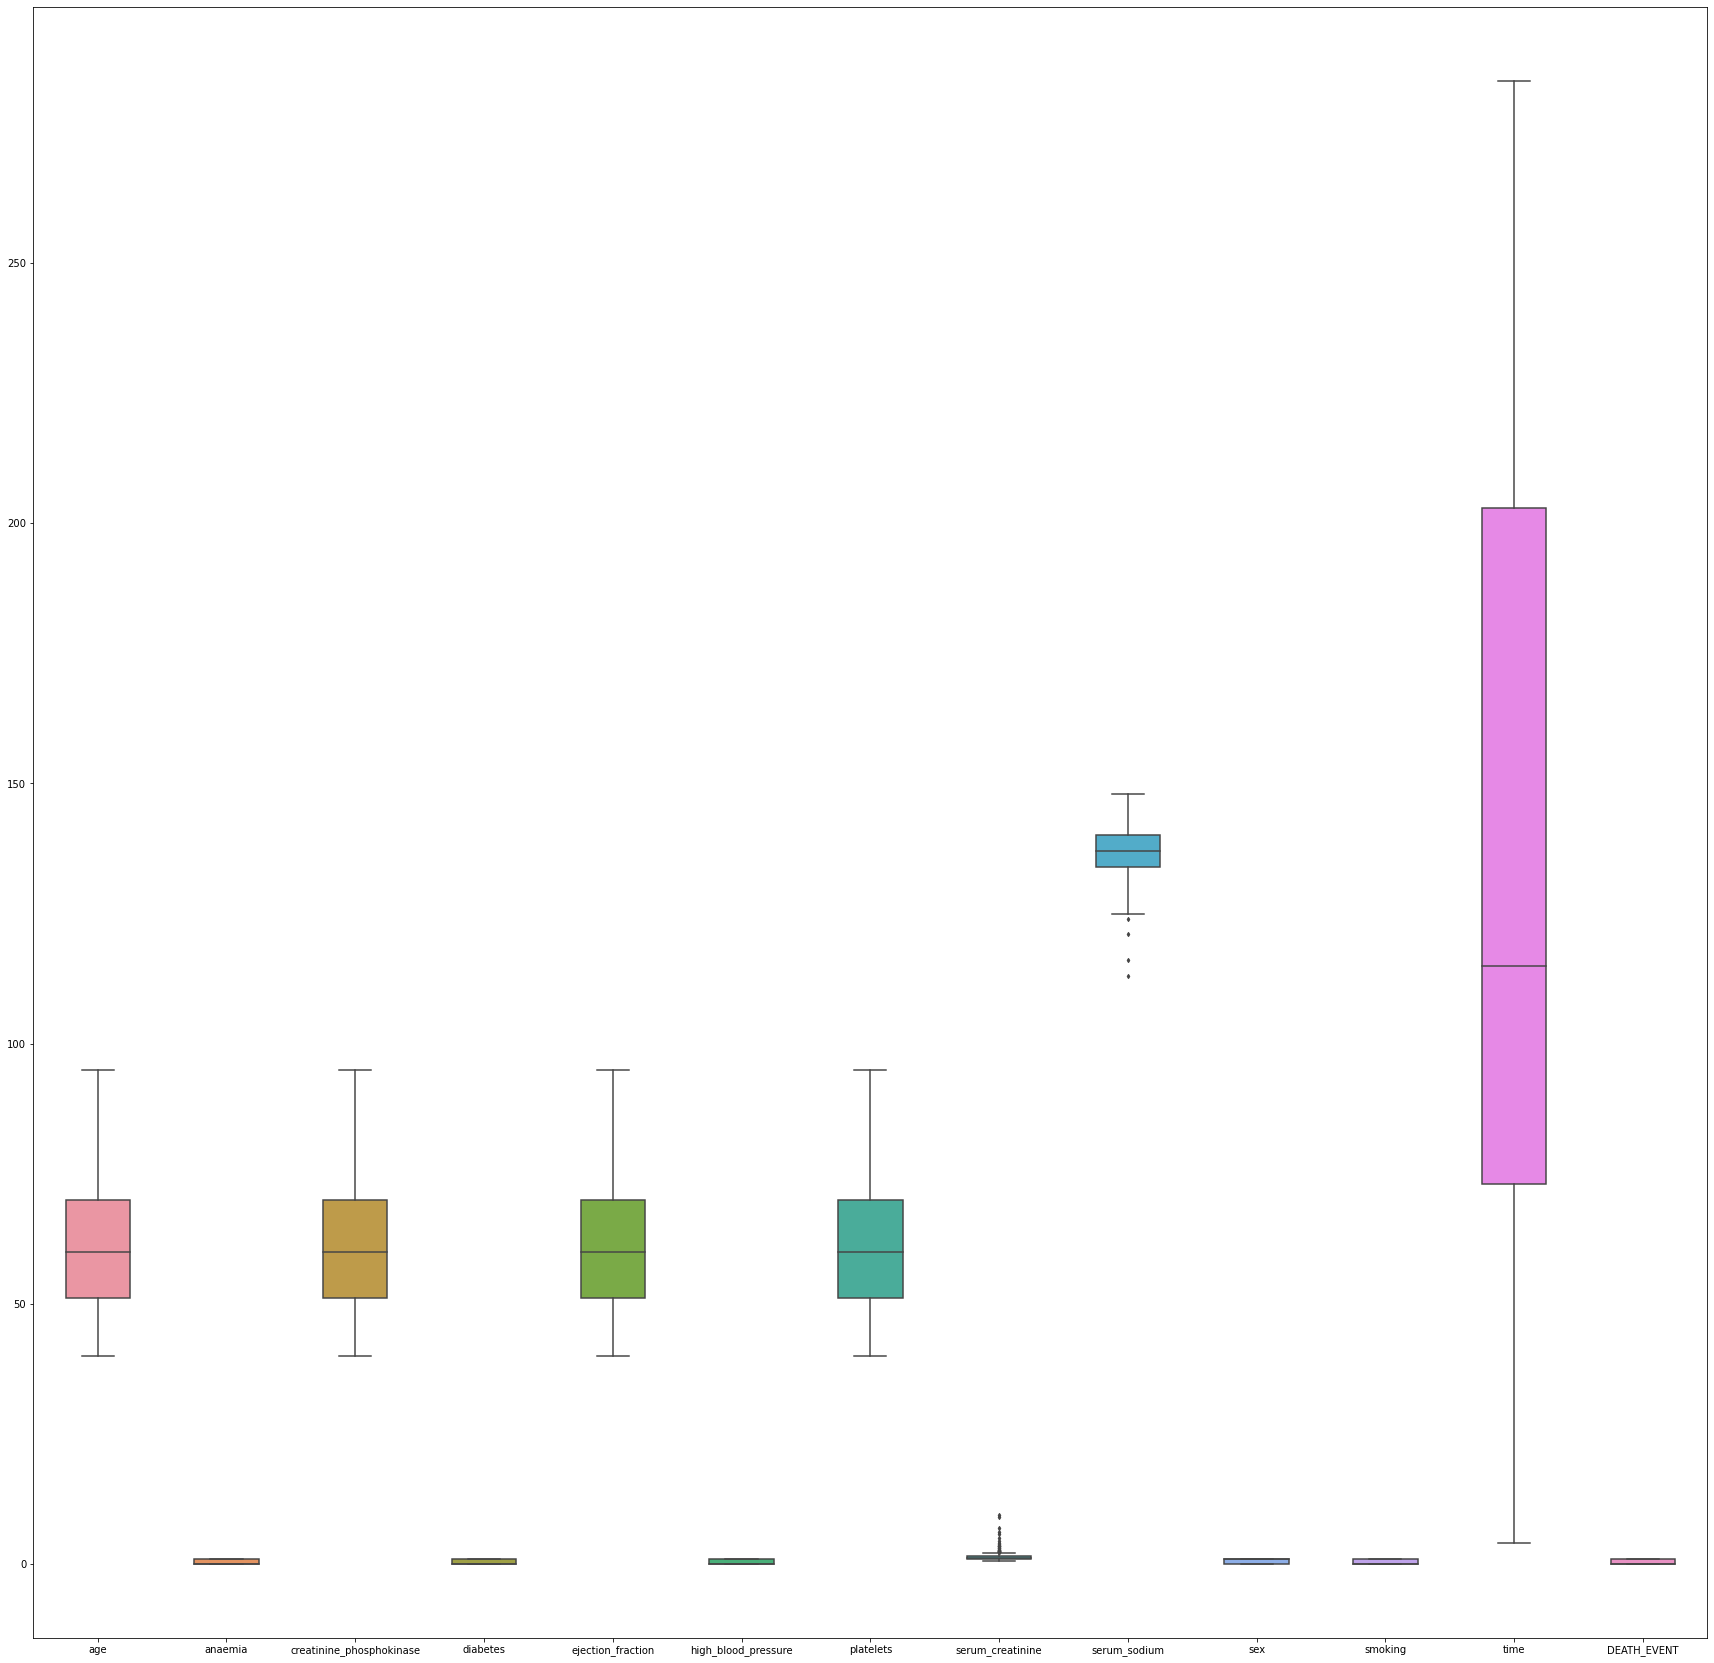

In [109]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [110]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]

In [111]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,75.0,0,75.0,1,75.0,1.9,130,1,0,4
1,55.0,0,NaN,0,55.0,0,55.0,1.1,136,1,0,6
2,65.0,0,65.0,0,65.0,0,65.0,1.3,129,1,1,7
3,50.0,1,50.0,0,50.0,0,50.0,1.9,137,1,0,7
4,65.0,1,65.0,1,65.0,0,65.0,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,62.0,1,62.0,1,62.0,1.1,143,1,1,270
295,55.0,0,55.0,0,55.0,0,55.0,1.2,139,0,0,271
296,45.0,0,45.0,1,45.0,0,NaN,0.8,138,0,0,278
297,45.0,0,NaN,0,45.0,0,45.0,1.4,140,1,1,280


In [112]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
upper

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,NaN,0.088006,1.000000,0.101012,1.000000,0.093289,1.000000,0.159187,0.045966,0.065430,0.018668,0.224068,0.253729
anaemia,NaN,NaN,0.088094,0.012729,0.088006,0.038182,0.066651,0.052174,0.041882,0.094769,0.107290,0.141414,0.066270
creatinine_phosphokinase,NaN,NaN,NaN,0.099831,1.000000,0.105653,1.000000,0.167714,0.018654,0.067291,0.007471,0.230618,0.273961
diabetes,NaN,NaN,NaN,NaN,0.101012,0.012732,0.072870,0.046975,0.089551,0.157730,0.147173,0.033726,0.001943
ejection_fraction,NaN,NaN,NaN,NaN,NaN,0.093289,1.000000,0.159187,0.045966,0.065430,0.018668,0.224068,0.253729
high_blood_pressure,NaN,NaN,NaN,NaN,NaN,NaN,0.101753,0.004935,0.037109,0.104615,0.055711,0.196439,0.079351
platelets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140773,0.040510,0.059987,0.018254,0.219894,0.246912
serum_creatinine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189095,0.006970,0.027414,0.149315,0.294278
serum_sodium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027566,0.004813,0.087640,0.195204
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445892,0.015608,0.004316


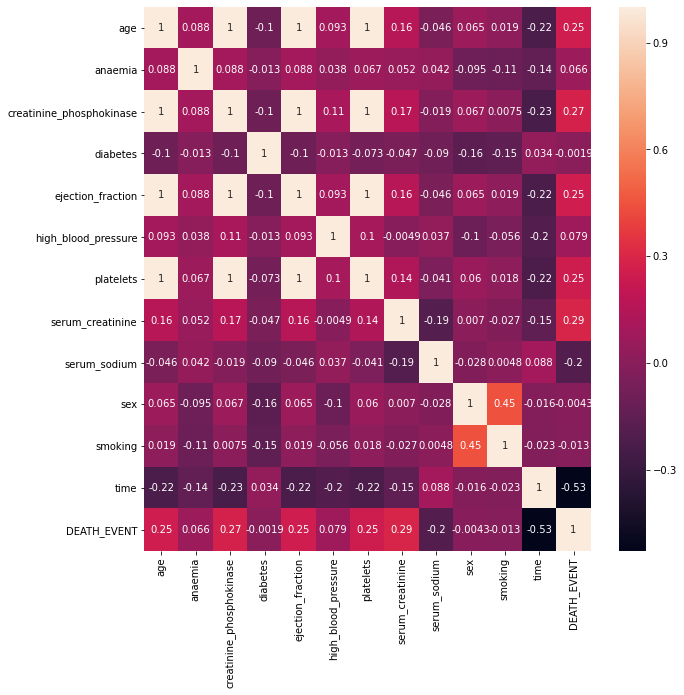

In [113]:
fig, ax = plt.subplots(figsize=(10,10))

corr=df.corr()
sns.heatmap(corr,annot=True)

In [118]:
x.columns
x=x.drop(['creatinine_phosphokinase', 'ejection_fraction', 'platelets'],axis=1)

In [119]:
type(x)

pandas.core.frame.DataFrame

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [122]:
df.isnull().sum()

age                          0
anaemia                      0
creatinine_phosphokinase    15
diabetes                     0
ejection_fraction            0
high_blood_pressure          0
platelets                   15
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64

In [123]:
df['creatinine_phosphokinase']=df['creatinine_phosphokinase'].fillna(df['creatinine_phosphokinase'].mean())
df['platelets']=df['platelets'].fillna(df['platelets'].mean())

In [124]:
y_pred = knn.predict(x_test)

In [125]:
print('KNN SCORE FOR XTRAIN AND Y TRAIN :  ',knn.score(x_train,y_train))
print('KNN SCORE FOR LABELS: ',knn.score(x_test,y_test))
print("The accuracy score is : ", accuracy_score(y_test,y_pred))



KNN SCORE FOR XTRAIN AND Y TRAIN :   0.84375
KNN SCORE FOR LABELS:  0.9066666666666666
The accuracy score is :  0.9066666666666666


In [126]:
knn.score(x_train,y_train)

0.84375

In [127]:
comp = pd.DataFrame({'y_test' : y_test,'ypred':y_pred})
comp

,y_test,ypred
215,0,0
19,1,1
247,0,0
106,0,0
298,0,0
...,...,...
85,0,0
286,0,0
295,0,0
205,0,0


In [128]:
knn.score(x_test,y_test)

0.9066666666666666

In [129]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.9066666666666666


In [130]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [8,9,10,4,6,7,15,19,15,17,18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [131]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [132]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 408 candidates, totalling 2040 fits
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=3 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=5 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=bal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=9 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=9 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=9 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=9 .................
[CV]  algorithm=ball_tree, leaf_size=8, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=8, n_neighbors=9 .................
[CV]  algo

[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=12 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=12, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=13, score=0.909, total= 

[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=5, score=0.886, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=7, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=7 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4, n_neighbors=9 .................
[CV]  algorithm=ball_tree, leaf_size=4, n_neighbors=9, score=0.756, total=   0.0s


[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=10 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=10 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=10, score=0.841, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=11, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=11, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=6, n_neighbors=11 ................
[CV]  algorithm=ball_tree, leaf_size=6, n_neighbors=11, score=0.867, total= 

[CV]  algorithm=ball_tree, leaf_size=7, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=7, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=7, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=7, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_neighbors=13 ................
[CV]  algorithm=ball_tree, leaf_size=7, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=3, score=0.756, total= 

[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=19, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=19, n_neighbors=10, score=0.778, tota

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=3, score=0.864, total

[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.841, to

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.909, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.867, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.844, tota

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.867, total= 

[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=12 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=12, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=8, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=8, n_neighbors=13, score=0.909, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, score=0.778, total=   0.0s
[CV]

[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=4, n_neighbors=13 ..................
[CV]  algorithm=kd_tree, leaf_size=4, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=6, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=6, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=6, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=6, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=6, n_neighbors=3 ...................
[CV]  algorithm=kd_tree, leaf_size=6, n_neighbors=3, score=0.756, total=   0.0s
[CV] algor

[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=7 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=7 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=7, n_neighbors=9 ...................
[CV]  algorithm=kd_tree, leaf_size=7, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=19, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=19, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=19, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=10, score=0.867, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.844, total=   0.0s
[CV]

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=11, score=0.778, total=   0.0s
[

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=5, score=0.778, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.841, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, score=0.886, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.822, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.886, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.867, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=8, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=12, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=12, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=12, score=0.909, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=8, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=8, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=10, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=4, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=4, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=4, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=4, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=4, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=4, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=4, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=4, n_neighbors=13 ....................
[CV]  algorithm=brute, leaf_size=4, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=brute, leaf_size=6, n_neighbors=3 .....................
[CV]  algorithm=brute, leaf_size=6, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=6, n_neighbors=3 .....................
[CV]  algorithm=brute, leaf_size=6, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=7, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=9 .....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=9 .....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=9, score=0.841, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.733, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=7, n_neighbors=10 ....................
[CV]  algorithm=brute, leaf_size=7, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=brute, le

[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=brute, leaf_size=19, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=19, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=19, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=19, n_neighbors=3, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=19, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=19, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=bru

[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, score=0.841, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, score=0.867, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.822, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.886, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.778, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.867, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.867, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.778, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.822, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.886, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 2040 out of 2040 | elapsed:   33.1s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 9, 10, 4, 6, 7, 15, 19, 15, 17, 18,
                                       20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [133]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 8, 'n_neighbors': 12}

In [134]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 8, n_neighbors = 10)

In [135]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=8, n_neighbors=10)

In [136]:
knn.score(x_train,y_train)

0.8214285714285714

In [137]:
knn.score(x_test,y_test)

0.8666666666666667

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.75      0.72      0.73        25

    accuracy                           0.83        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.83      0.83      0.83        75



In [110]:
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
acc  = (tp+tn)/(tp+fp+tn+fn)
pre = (tp)/(tp+fp)
print('HEART DISEASE')
print('CONFUSION MATRIX \n',cm)
print('ACCURACY \n',acc)
print('PRECISION \n',pre)


HEART DISEASE
CONFUSION MATRIX 
 [[44  6]
 [ 7 18]]
ACCURACY 
 0.8266666666666667
PRECISION 
 0.88


In [112]:
rc = roc_auc_score(y_test,y_pred)
print('ROC VALUE ',rc)


ROC VALUE  0.8


ROC VALUE 0.8


Text(0, 0.5, 'True Positive Rate')

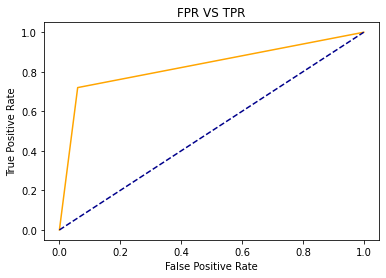

In [157]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)
print('ROC VALUE',rc)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % rc)
plt.title('FPR VS TPR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')